In [1]:
import numpy as np
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_shortest_path(G, nodes):
    '''
    INPUT: graph and two nodes
    OUTPUT: plot of the graph showing shortest path between two nodes

    Print and plot the shortest path between two nodes in a graph
    '''
    # calculate the shortest path between two nodes
    path = nx.shortest_path(G, source=nodes[0], target=nodes[1])

    # print the path
    print 'Shortest path from {} to {}: '.format(nodes[0], nodes[1])
    path_str = [p + ' --> ' if p != nodes[1] else p for p in path]
    print ''.join(path_str)
    fig = plt.figure()
    # plot all of the nodes and edges in the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=20, node_color='#191970', edge_color='#191970')
    
    # plot the path between the two nodes
    path_edges = zip(path, path[1:])
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='#DF0174', node_size=60)
    nx.draw_networkx_nodes(G, pos, nodelist=[nodes[0], nodes[1]], node_color='#DF0174', node_size=100)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='#DF0174', width=3)
    fig.set_facecolor('#FACC2E')
    plt.savefig('social_network.png', facecolor=fig.get_facecolor())
    plt.title('Path between users {} and {}'.format(nodes[0], nodes[1]))
    plt.show()

In [3]:
# Load the data and explore it
G = nx.read_edgelist('facebook_combined.txt')

# Count the number of nodes and number of edges
print 'Dataset contains:'
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print '{} Edges'.format(num_edges)
print '{} Nodes'.format(num_nodes)

# count the number of connected components
communities = nx.number_connected_components(G)
print '{} Community\n'.format(communities)

print 'most important user (degree centrality): ', Counter(nx.degree_centrality(G)).most_common(1)[0][0]
print 'most important user (eigenvector centrality): ', Counter(nx.eigenvector_centrality(G)).most_common(1)[0][0]

Dataset contains:
88234 Edges
4039 Nodes
1 Community

most important user (degree centrality):  107
most important user (eigenvector centrality):  1912


Shortest path from 3364 to 3198: 
3364 --> 1684 --> 3198


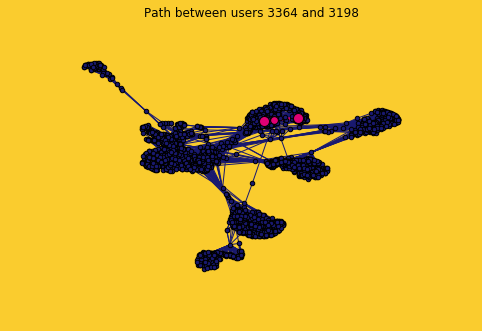

In [4]:
# Print and plot the path between any two nodes
all_nodes = G.nodes()
two_nodes = np.random.choice(all_nodes, 2, replace=False)
plot_shortest_path(G, two_nodes)